In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hamdallak_the_iqothnccd_lung_cancer_dataset_path = kagglehub.dataset_download('hamdallak/the-iqothnccd-lung-cancer-dataset')
dishantrathi20_ct_scan_images_for_lung_cancer_path = kagglehub.dataset_download('dishantrathi20/ct-scan-images-for-lung-cancer')

print('Data source import complete.')


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000328_08_03_180.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000223_09_02_146.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000229_03_04_202.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000103_01_01_104.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000103_12_01_075.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000143_04_02_153.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/002276_05_03_078.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000020_03_01_166.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000054_03_01_025.png
/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Test cases/000230_04_01_242.png
/kaggle/input/ct-scan-images-for-lung-cancer/Lungc

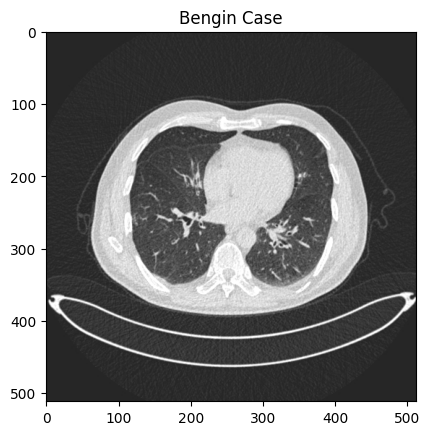

In [ ]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg')
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

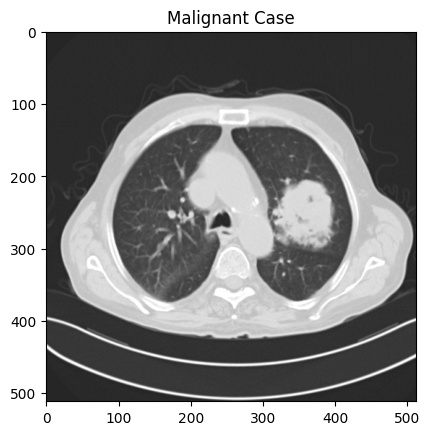

In [ ]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (10).jpg')
plt.title('Malignant Case')
plt.imshow(img)


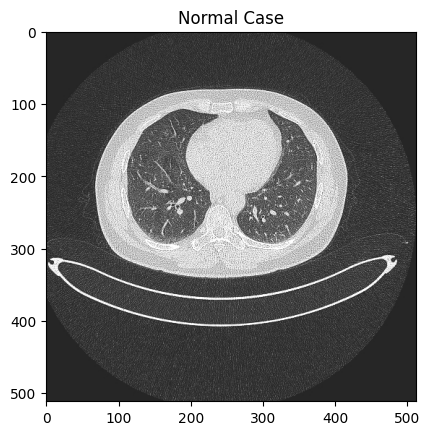

In [ ]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (100).jpg')
plt.title('Normal Case')
plt.imshow(img)

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
dir = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
img_width = 256
img_height = 256

In [ ]:
# Second section of the path
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [ ]:
random.shuffle(img_data)

In [ ]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)

#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [ ]:
print(X[19])

[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]]


In [ ]:
for i in range(len(X)):
    X[i] = X[i]/255.0

In [ ]:
X.shape

(1097, 256, 256, 3)

In [ ]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Create the ImageDataGenerator for real-time augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to your training data
datagen.fit(x_train)

# Define the deep CNN model
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(256, 256, 3), activation='relu'))
model.add(AvgPool2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.2, seed=12))
model.add(Dense(3000, activation='relu'))
model.add(Dense(1500, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assumes 3-class classification

In [ ]:
# Save the model
model.save("lung_cancer_detection_model.h5")
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("lung_cancer_detection_model.h5")

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 128, 128, 128)  │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │    49,155,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     4,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,365,643 (207.39 MB)

 Trainable params: 54,365,643 (207.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.4394 - loss: 1.7127 - val_accuracy: 0.3636 - val_loss: 0.9934
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 266ms/step - accuracy: 0.4390 - loss: 0.9737 - val_accuracy: 0.5341 - val_loss: 0.9362
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.5313 - loss: 0.9407 - val_accuracy: 0.5341 - val_loss: 0.9020
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 268ms/step - accuracy: 0.5100 - loss: 0.9227 - val_accuracy: 0.5341 - val_loss: 0.8783
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.5505 - loss: 0.9066 - val_accuracy: 0.6705 - val_loss: 0.7197
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.6668 - loss: 0.8007 - val_accuracy: 0.7727 - val_loss: 0.6169
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.7354 - loss: 0.6511 - val_accuracy: 0.8239 - val_loss: 0.4798
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.7727 - loss: 0.5514 - val_accuracy: 

In [ ]:
result = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 951ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.9249 - loss: 0.2799
Test Loss: 0.3514798879623413
Test Accuracy: 0.9090909361839294


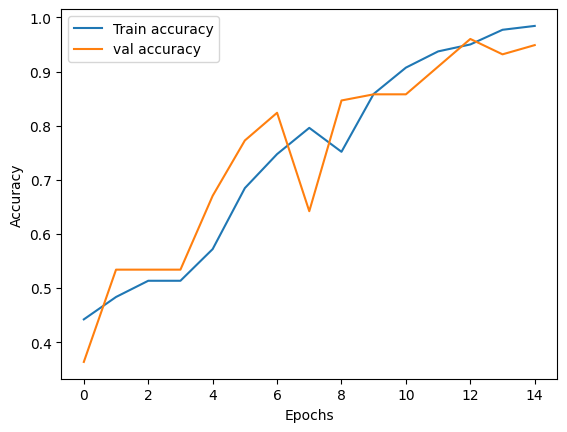

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

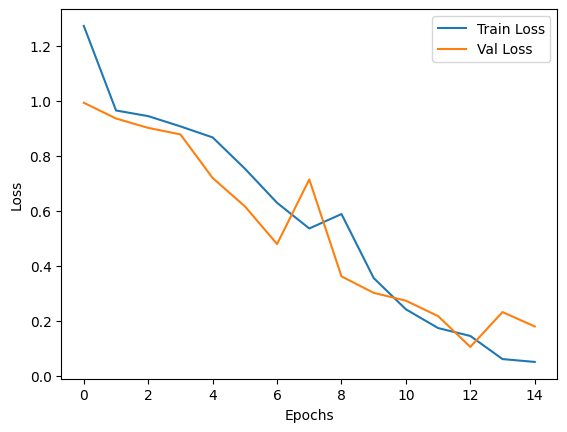

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class Label: 0
Confidence: 1.0
Predicted Category: Benign


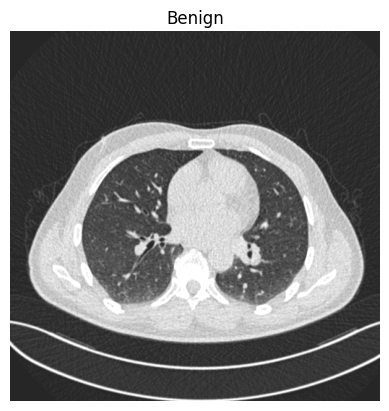

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Data/valid/Bengin cases/Bengin case (114).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width))

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class Label: 1
Confidence: 1.0
Predicted Category: Malignant


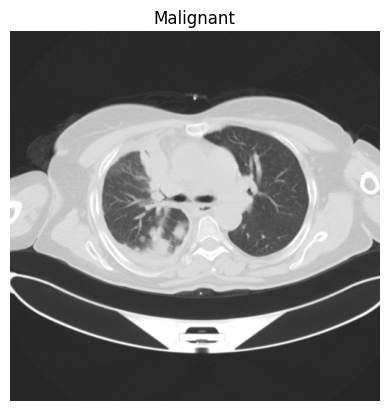

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Data/test/MalignantCases/Malignant case (464).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width))

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class Label: 2
Confidence: 1.0
Predicted Category: Normal


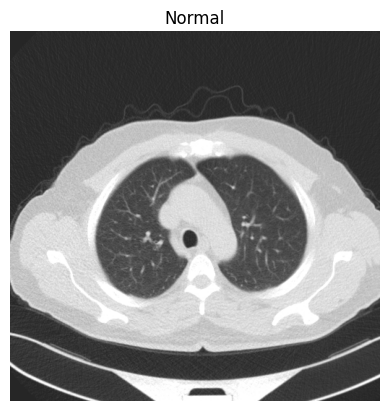

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Data/valid/normal/Normal case (345).jpg'
img = cv2.imread(image_path)


img = cv2.resize(img, (img_height, img_width))

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

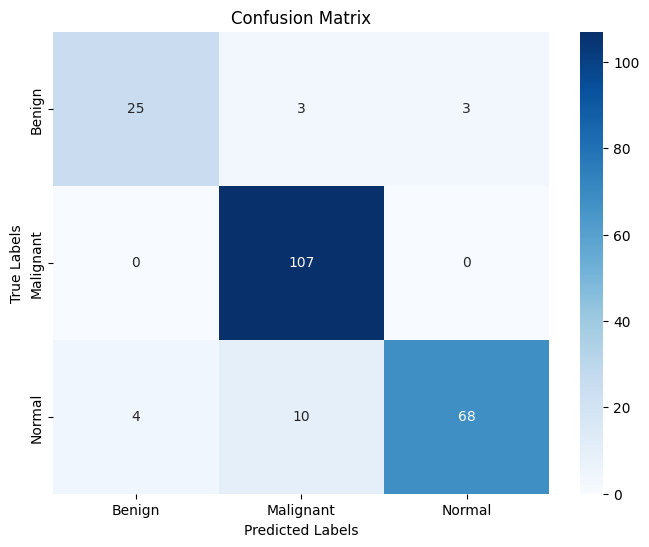

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define true labels and predicted labels
true_labels = y_test
predicted_labels = np.argmax(result, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels_to_categories.values(),
            yticklabels=class_labels_to_categories.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("model.h5")